In [1]:
!python --version

Python 3.10.14


In [3]:
# 필요한 라이브러리 로딩
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck']

# 함수로 전체 모델 구현

In [5]:
# 데이터 불러오기
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [6]:
# 이미지 탐색
# 데이터 형태 확인
print('데이터 형태 확인')
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

데이터 형태 확인
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


훈련 이미지 시각화


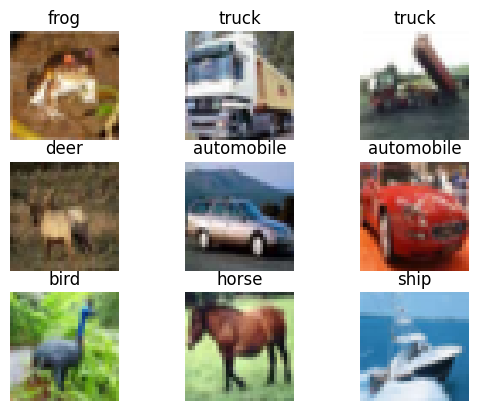

테스트 이미지 시각화


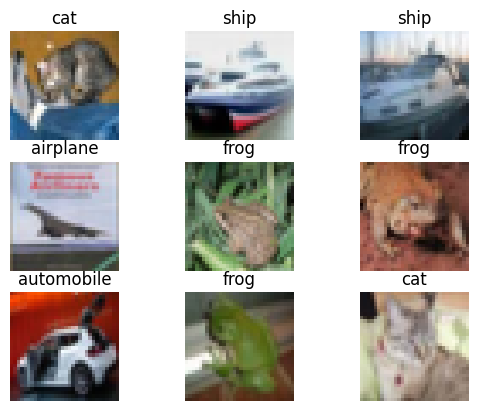

In [7]:


# 훈련데이터 이미지 시각화
print('훈련 이미지 시각화')
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

# 테스트 데이터 이미지 시각화
print('테스트 이미지 시각화')
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i])
    plt.title(class_names[y_test[i][0]])
    plt.axis('off')
plt.show()

In [8]:
# 전처리
# 정규화
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [9]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape

(50000, 10)

# 모델 구성

In [10]:
# 1 VGG BLOCKS 모델 생성
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32,32,3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

/opt/anaconda3/envs/tf_env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-08-06 14:17:58.969321: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-08-06 14:17:58.969379: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-08-06 14:17:58.969407: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-08-06 14:17:58.969430: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-06 14:17:58.969444: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_facto

In [11]:
# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
# 체크 포인트, 조기종료 설정
checkpoint = ModelCheckpoint('vgg4_model.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

earlystopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='max')

In [15]:
# 모델 학습
history = model.fit(x_train, y_train, epochs=40, batch_size=128, validation_data=(x_test, y_test), callbacks=[checkpoint, earlystopping])

Epoch 1/40


2024-08-06 14:18:27.171928: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2974 - loss: 2.0119
Epoch 1: val_accuracy improved from -inf to 0.52220, saving model to vgg4_model.keras
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.2977 - loss: 2.0110 - val_accuracy: 0.5222 - val_loss: 1.3306
Epoch 2/40
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5730 - loss: 1.2091
Epoch 2: val_accuracy improved from 0.52220 to 0.61080, saving model to vgg4_model.keras
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.5731 - loss: 1.2088 - val_accuracy: 0.6108 - val_loss: 1.0944
Epoch 3/40
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6457 - loss: 1.0102
Epoch 3: val_accuracy improved from 0.61080 to 0.64470, saving model to vgg4_model.keras
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.6458 - loss: 1.0101 - val_accuracy: 0.6447 - val_loss: 1.0098
Epoch 4/40
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6865 - loss: 0.8975
Epoch 4: val_accuracy improved from 0.6447

In [16]:
# 테스트 데이터 예측 및 모델 평가
def evaluate_model(model, x_test, y_test):
    scores = model.evaluate(x_test, y_test)
    return scores

# 실제 모델링 시작

In [19]:
# 데이터 로딩
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 데이터 탐색
explore_data(x_train, y_train, x_test, y_test, class_names)

NameError: name 'explore_data' is not defined

In [ ]:
# 데이터 전처리
x_train, y_train, x_test, y_test = preprocess_data(x_train, y_train, x_test, y_test)

In [ ]:
vgg1 = vgg_model_1((32,32,3))
print('VGG1 모델 요약')
print(vgg1.summary())

VGG1 모델 요약


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
vgg2 = vgg_model_2((32,32,3))
print('VGG2 모델 요약')
print(vgg2.summary())

VGG2 모델 요약


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 591,274 (2.26 MB)

 Trainable params: 591,274 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
vgg3 = vgg_model_3((32,32,3))
print('VGG3 모델 요약')
print(vgg3.summary())

VGG3 모델 요약


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 550,570 (2.10 MB)

 Trainable params: 550,570 (2.10 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
vgg1 = compile_model(vgg1)
vgg2 = compile_model(vgg2)
vgg3 = compile_model(vgg3)

In [ ]:
vgg1 = train_model(vgg1, x_train, y_train, x_test, y_test, 100, 64)
vgg1.save('vgg1_model.h5')

Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4025 - loss: 1.6897
Epoch 1: val_accuracy improved from -inf to 0.60120, saving model to model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.4026 - loss: 1.6893 - val_accuracy: 0.6012 - val_loss: 1.1185
Epoch 2/100
771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6474 - loss: 1.0054
Epoch 2: val_accuracy improved from 0.60120 to 0.63840, saving model to model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6475 - loss: 1.0051 - val_accuracy: 0.6384 - val_loss: 1.0406
Epoch 3/100
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7035 - loss: 0.8451
Epoch 3: val_accuracy improved from 0.63840 to 0.67130, saving model to model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7035 - loss: 0.8451 - val_accuracy: 0.6713 - val_loss: 0.9515
Epoch 4/100
768/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7434 - loss: 0.7353
Epoch 4: val_accuracy did not improve from 0.67130
7

In [ ]:
vgg2 = train_model(vgg2, x_train, y_train, x_test, y_test, 100, 64)
vgg2.save('vgg2_model.h5')

Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4129 - loss: 1.6198
Epoch 1: val_accuracy improved from -inf to 0.64410, saving model to model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.4131 - loss: 1.6194 - val_accuracy: 0.6441 - val_loss: 1.0308
Epoch 2/100
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6821 - loss: 0.9160
Epoch 2: val_accuracy improved from 0.64410 to 0.70100, saving model to model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6821 - loss: 0.9159 - val_accuracy: 0.7010 - val_loss: 0.8677
Epoch 3/100
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7526 - loss: 0.7126
Epoch 3: val_accuracy improved from 0.70100 to 0.72540, saving model to model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7526 - loss: 0.7126 - val_accuracy: 0.7254 - val_loss: 0.8022
Epoch 4/100
778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7950 - loss: 0.5817
Epoch 4: val_accuracy did not improve from 0.72540

In [ ]:
vgg3 = train_model(vgg3, x_train, y_train, x_test, y_test, 100, 64)
vgg3.save('vgg3_model.h5')

Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3540 - loss: 1.7768
Epoch 1: val_accuracy improved from -inf to 0.57780, saving model to model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.3541 - loss: 1.7764 - val_accuracy: 0.5778 - val_loss: 1.1703
Epoch 2/100
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6398 - loss: 1.0211
Epoch 2: val_accuracy improved from 0.57780 to 0.69040, saving model to model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.6399 - loss: 1.0209 - val_accuracy: 0.6904 - val_loss: 0.9008
Epoch 3/100
776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7299 - loss: 0.7716
Epoch 3: val_accuracy improved from 0.69040 to 0.72640, saving model to model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7300 - loss: 0.7715 - val_accuracy: 0.7264 - val_loss: 0.7888
Epoch 4/100
775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7873 - loss: 0.6086
Epoch 4: val_accuracy improved from 0.72640 to 0

In [ ]:
scores1 = evaluate_model(vgg1, x_test, y_test)
scores2 = evaluate_model(vgg2, x_test, y_test)
scores3 = evaluate_model(vgg3, x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6672 - loss: 1.3028
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7218 - loss: 1.5159
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7534 - loss: 1.0315


In [ ]:
print('VGG1 Accuracy: %.3f' % scores1[1])
print('VGG2 Accuracy: %.3f' % scores2[1])
print('VGG3 Accuracy: %.3f' % scores3[1])

VGG1 Accuracy: 0.662
VGG2 Accuracy: 0.727
VGG3 Accuracy: 0.752


In [ ]:
# 실제 이미지로 예측
def predict_image(model, img_path):
    pass

# 정확도를 향상시킨 모델
참조: https://hdevstudy.tistory.com/116

In [ ]:
from keras.datasets import cifar10

# 데이터 로딩
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# 데이터 형태 확인
print(x_train.shape, y_train.shape) # (50000, 32, 32, 3) (50000, 1)
print(x_test.shape, y_test.shape) # (10000, 32, 32, 3) (10000, 1)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [ ]:
# 라벨이름 저장
label_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

훈련 이미지 시각화


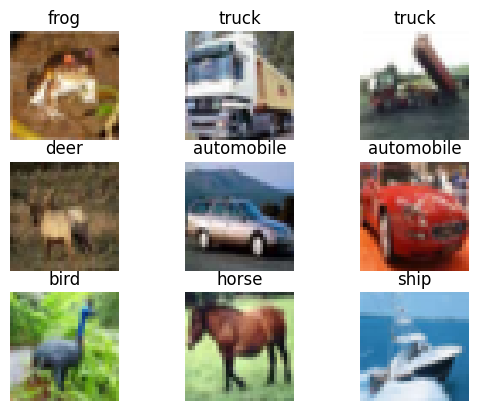

In [ ]:
import matplotlib.pyplot as plt

print('훈련 이미지 시각화')
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i])
    plt.title(label_names[y_train[i][0]])
    plt.axis('off')
plt.show()

테스트 이미지 시각화


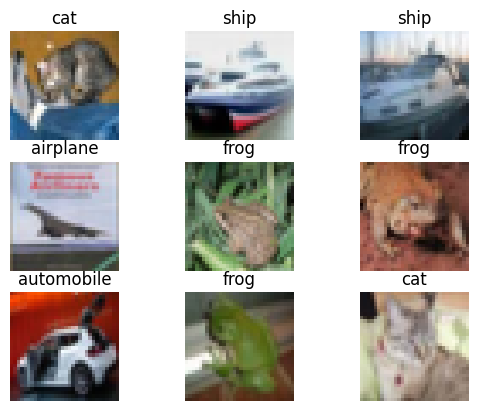

In [ ]:
# 테스트 데이터 이미지 시각화
print('테스트 이미지 시각화')
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i])
    plt.title(label_names[y_test[i][0]])
    plt.axis('off')
plt.show()

In [ ]:
# 데이터 전처리
from keras.utils import to_categorical

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# 2 VGG BLOCKS + DROPOUT 모델 생성
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

def vgg_model_4(input_shape):
    model4 = Sequential()

    # Convolutional Block (Conv-Conv-Pool-Dropout)
    model4.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model4.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model4.add(MaxPooling2D(pool_size=(2, 2)))
    model4.add(Dropout(0.25))

    # Convolutional Block (Conv-Conv-Pool-Dropout)
    model4.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model4.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model4.add(MaxPooling2D(pool_size=(2, 2)))
    model4.add(Dropout(0.25))

    # Classifying
    model4.add(Flatten())
    model4.add(Dense(512, activation='relu'))
    model4.add(Dropout(0.5))
    model4.add(Dense(10, activation='softmax'))

    return model4

In [ ]:
# 모델 요약
vgg4 = vgg_model_4((32,32,3))
print('VGG4 모델 요약')
print(vgg4.summary())

VGG4 모델 요약


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,168,362 (8.27 MB)

 Trainable params: 2,168,362 (8.27 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# 모델 컴파일
from keras.optimizers import Adam

vgg4.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# 모델 체크포인트 설정
checkpoint = ModelCheckpoint('vgg4_model.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# 조기 종료 설정
earlystopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='max')

In [ ]:
# 모델 훈련
history = vgg4.fit(x_train, y_train, batch_size=128, epochs=40, validation_data=(x_test, y_test), callbacks=[checkpoint, earlystopping])

In [ ]:
# 모델 평가
scores4 = vgg4.evaluate(x_test, y_test)
print('VGG4 Accuracy: %.3f' % scores4[1])
print('VGG4 Loss: %.3f' % scores4[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8080 - loss: 0.7182
VGG4 Accuracy: 0.803
VGG4 Loss: 0.718


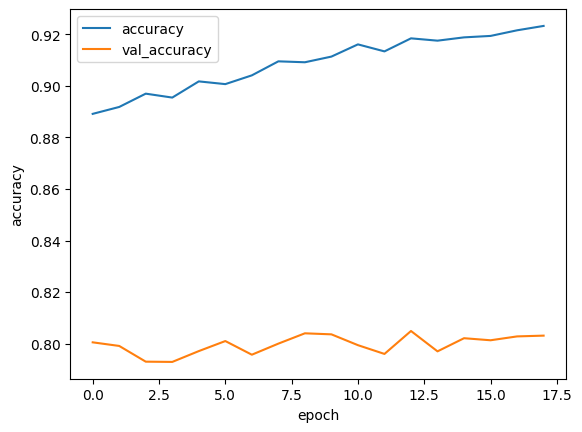

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

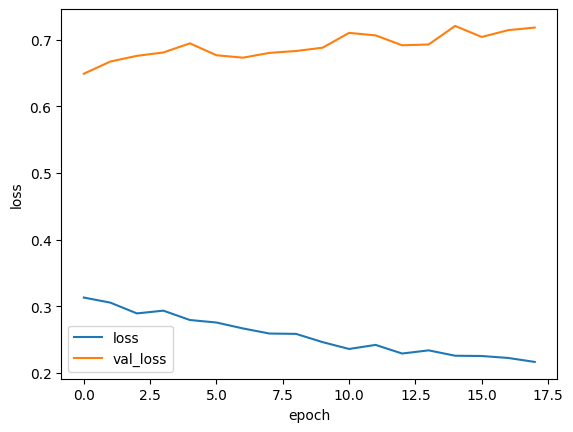

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
# 예측
import numpy as np
from keras.preprocessing import image
from keras.preprocessing.image import load_img, img_to_array

# 이미지 로드 및 전처리
test_image = image.load_img('/content/plane_256x256.jpg', target_size=(32,32))
test_image = img_to_array(test_image)/255.0
test_image = np.expand_dims(test_image, axis=0) # (1, 32, 32, 3)

# [[[1, 2, 3], [4, 5, 6]],[[1, 2, 3],[3, 4, 5]]]

In [ ]:
# 예측
pred = vgg4.predict(test_image)
print(pred)

# 확률이 가장 높은 숫자 반환
pred_num = np.argmax(pred, axis=1)[0]
pred_num

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[1.0000000e+00 9.8870157e-10 8.6495108e-12 3.1090104e-14 2.6728114e-16
  3.9952510e-20 1.5272324e-13 1.6916310e-20 2.4991113e-08 6.5803266e-12]]


0

In [ ]:
label_names[pred_num]

'airplane'

In [ ]:
pred[0][pred_num]

1.0